<a href="https://colab.research.google.com/github/sourabhsingh282/-Denoising-with-autoencoder/blob/master/final_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What are autoencoders?
![alt text](https://blog.keras.io/img/ae/autoencoder_schema.jpg )

###"Autoencoding" is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples rather than engineered by a human. Additionally, in almost all contexts where the term "autoencoder" is used, the compression and decompression functions are implemented with neural networks.

1) Autoencoders are data-specific, which means that they will only be able to compress data similar to what they have been trained on. This is different from, say, the MPEG-2 Audio Layer III (MP3) compression algorithm, which only holds assumptions about "sound" in general, but not about specific types of sounds. An autoencoder trained on pictures of faces would do a rather poor job of compressing pictures of trees, because the features it would learn would be face-specific.

2) Autoencoders are lossy, which means that the decompressed outputs will be degraded compared to the original inputs (similar to MP3 or JPEG compression). This differs from lossless arithmetic compression.

3) Autoencoders are learned automatically from data examples, which is a useful property: it means that it is easy to train specialized instances of the algorithm that will perform well on a specific type of input. It doesn't require any new engineering, just appropriate training data.

To build an autoencoder, you need three things: an encoding function, a decoding function, and a distance function between the amount of information loss between the compressed representation of your data and the decompressed representation (i.e. a "loss" function). The encoder and decoder will be chosen to be parametric functions (typically neural networks), and to be differentiable with respect to the distance function, so the parameters of the encoding/decoding functions can be optimize to minimize the reconstruction loss, using Stochastic Gradient Descent. It's simple! And you don't even need to understand any of these words to start using autoencoders in practice.

#Are they good at data compression?
Usually, not really. In picture compression for instance, it is pretty difficult to train an autoencoder that does a better job than a basic algorithm like JPEG, and typically the only way it can be achieved is by restricting yourself to a very specific type of picture (e.g. one for which JPEG does not do a good job). The fact that autoencoders are data-specific makes them generally impractical for real-world data compression problems: you can only use them on data that is similar to what they were trained on, and making them more general thus requires lots of training data. But future advances might change this, who knows.

#What are autoencoders good for?
###Today two interesting practical applications of autoencoders are data denoising (which we feature later in this post), and dimensionality reduction for data visualization. With appropriate dimensionality and sparsity constraints, autoencoders can learn data projections that are more interesting than PCA or other basic techniques.

In [ ]:
import google.colab #to import the google colab
from google.colab import drive #import the drive from google colab
drive.mount('/content/gdrive') #mounting the drive with the colab

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


##Lets first import some important libraries which help some data mining and data handling 

In [ ]:
import os                       #import the py.os library to operate on systems files 
import cv2                      #to impoprt open CV is the imaging library used to do operation on images and to handle image dataset
import pandas as pd             #import pandas for  data manipulation and analysis.
import numpy as np              #import numpy pyhton libbrary for  data manipulation and analysis.
import matplotlib.pyplot as plt #matplotlib is the plotting library to import the data
import seaborn as sns           #import seaborn which is sata visualisation library
import random                   #rimport andom module This allows you to then just call random() directly



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#About dataset
##It is pancreatic cancer  dataset which contain MRI SCAN of multiple patients in the form of png images
###It is a 3 scale image dataset which is obtain by the slicing of of 3D MRI scan and after converting it from the diacom image to png images, these are the high pixel 512*512 size images 

###Start with Loading our dataset

In [ ]:
train_dataset = '/content/gdrive/My Drive/Pancreas-CT-PNG/PANCREAS_0020'  
test_dataset = '/content/gdrive/My Drive/Pancreas-CT-PNG/PANCREAS_0021'

In [ ]:
train = os.listdir(train_dataset) #storing train dataset into train variable
test = os.listdir(test_dataset)   #storing the list of test dataset into test variable
import sklearn.model_selection as model_selection  #import the model_selection from sklearn to split the train and test,
                                                   # with train_test-split function  
X_train, X_test, = model_selection.train_test_split(train, train_size=0.90,  random_state=101)



In [ ]:
len(X_train) #length function ro give the number of dataset we have

196

In [ ]:
len(X_test)  #length function to give number of test dataset we have 

22

In [ ]:
print(X_train)

In [ ]:
print(X_test)    
 

['000058.png', '000110.png', '000059.png', '000171.png', '000004.png', '000149.png', '000164.png', '000026.png', '000139.png', '000190.png', '000146.png', '000118.png', '000086.png', '000128.png', '000161.png', '000032.png', '000116.png', '000174.png', '000017.png', '000071.png', '000018.png', '000036.png']


#Now will gonna do some feature engineering in which we will append all images into an array 

In [ ]:
img_training_dataset=[]  #declairing  the img_training_dataset array to stor each photo on continous
                         # so that manupulation will be easy
for i in X_train:
 img_training_dataset.append(cv2.imread(os.path.join(train_dataset,i),0))  # appending each images into above list
 

In [ ]:
img_testing_dataset=[]
for i in X_test:
  img_testing_dataset.append(cv2.imread(os.path.join(test_dataset,i),0))

# Now we will gonna do the Normalization 
Similarly, the goal of normalization is to change the values of numeric columns in the dataset to a common scale,

In [ ]:
img_training_dataset = np.array(img_training_dataset)  #converting the img_training dataset into numpy array
img_testing_dataset = np.array(img_testing_dataset)    #converting the imgtesting dataset into numpy array
img_training_dataset = img_training_dataset/255        #rescalling the value of numpy array img_training_dataset
img_testing_dataset = img_testing_dataset/255          #rescalling the value of numpy array img_testing_dataset

# LET VISUALIZE OUR  DATASET


In [ ]:
print(img_training_dataset.shape) #In the given tuble 1st  value shows number of images and 
                                  #two is the size of the images 

print(img_testing_dataset.shape) # 

(196, 512, 512)
(22, 512, 512)


###We will now see the 1st image of the dataset
Note : this is the RBG (3scale image dataset)

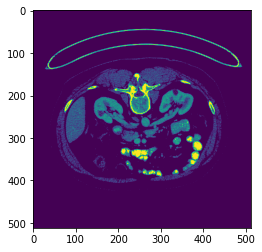

In [ ]:

plt.imshow(img_testing_dataset[0]) #this is and rbg image with channel 3 
                                   #and if you dont specify the cmap it will by defualt give you the rgb image

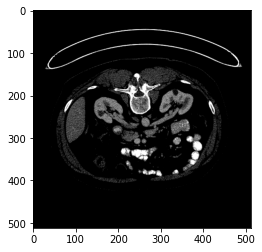

In [ ]:
plt.imshow(img_testing_dataset[0], cmap='gray') #after specifying the cmap as gray we will get a grayscale images

#Let's look into more grayscale images

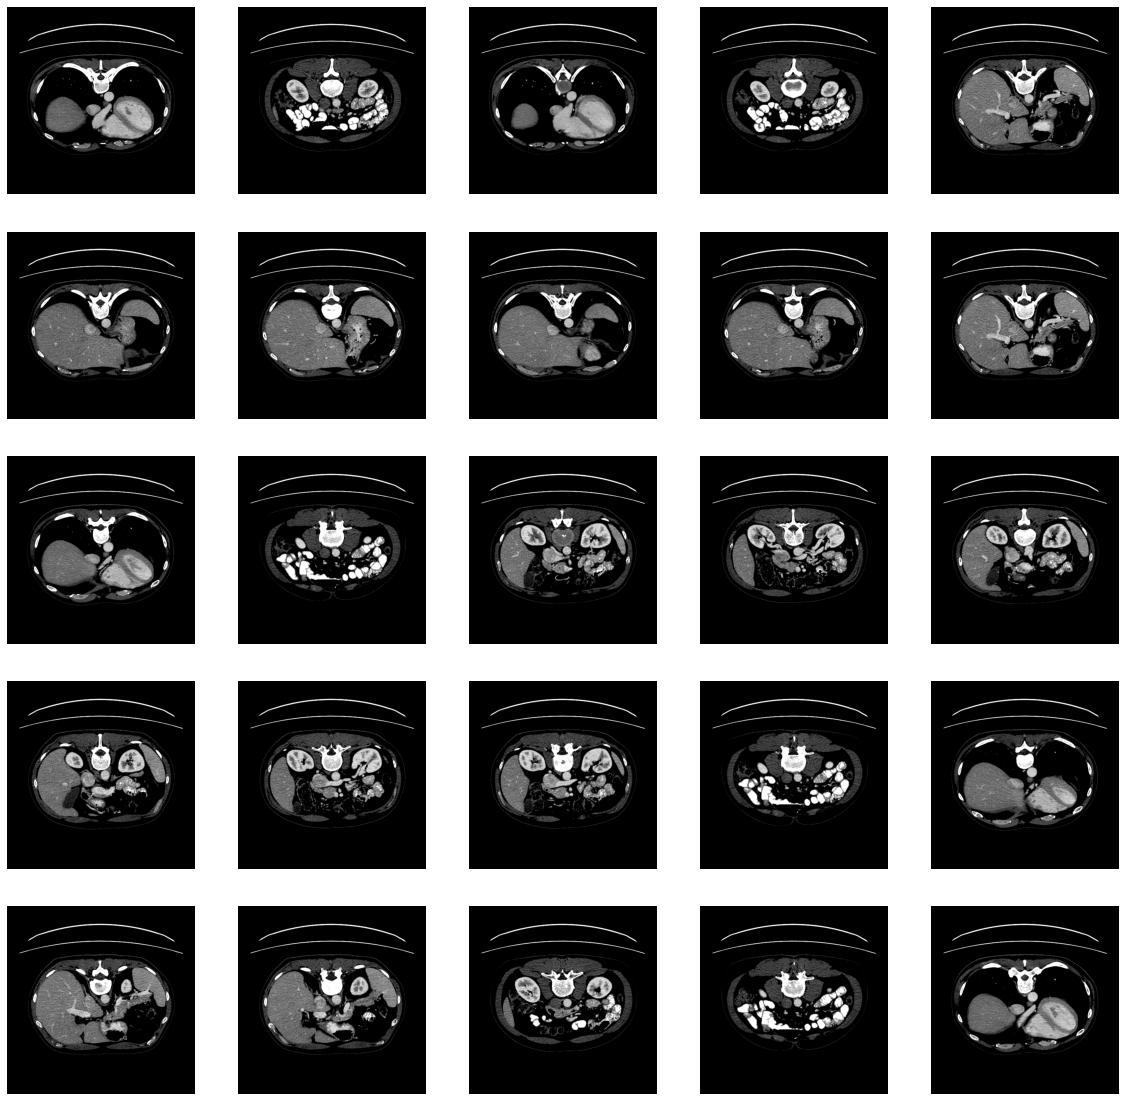

In [ ]:
l_grid=5
w_grid=5
fig,axes=plt.subplots(l_grid,w_grid,figsize=(20,20))
axes=axes.ravel()
for i in range(l_grid*w_grid):
  index=np.random.randint(0,len(img_training_dataset))
  axes[i].imshow(img_training_dataset[index],cmap='gray')
  axes[i].set_axis_off()

In [ ]:
img_training_dataset #looking the numpy array of our img_training_dataset

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
img_testing_dataset  #looking numpy array of our img_testing_dataset

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
img_testing_dataset.shape  #shape of our img_testing_dataset


(22, 512, 512)

In [ ]:
img_training_dataset.shape #shape of ouor img_trainging_dataset

(196, 512, 512)

#So till now we have already looked into our Dataset, 
#Now lets put some noise

In [ ]:
noise_factor = 0.3                         #noise factor which we appply on every image of our dataset
noise_training_dataset = []                #declairing the noise_training_dataset array
for img in img_training_dataset:           #loop for itterate on each images of img_training_dataset
  noisy_image = img + noise_factor*np.random.randn(*img.shape) #generating the noise_images
  noisy_image = np.clip(noisy_image, 0,1)   
  noise_training_dataset.append(noisy_image)  #appending each images into our noise_training_dartaset

In [ ]:
noise_factor = 0.3              #noise factor which we appply on every image of our dataset
noise_test_dataset = []         #declairing the noise_test_dataset array
for img in img_testing_dataset: #loop for itterate on each images of img_test_dataset
  noisy_image = img + noise_factor*np.random.randn(*img.shape) #generating the noise_images
  noisy_image = np.clip(noisy_image, 0,1)
  noise_test_dataset.append(noisy_image) #appending each images into our noise_training_dartaset

##So we have just finish our first important work that is generating the noise data  so that we can finally apply out autoencoder to clean them
# But wait before we have to  NORMALIZE it too so that we will not face any difficuty while applying our autoencoders,
#let's first normalize noise dataset

In [ ]:
noise_training_dataset = np.array(noise_training_dataset) #converting the noise_training dataset into numpy array
noise_test_dataset= np.array(noise_test_dataset)          #converting the noise_test_dataset into numpy array
noise_training_dataset = noise_training_dataset/255       #rescalling the value of numpy array noise_training_dataset
noise_test_dataset = noise_test_dataset/255               #rescalling the value of numpy array noise_test_dataset

#Let's Visualize our Noise Dataset

In [ ]:
len(noise_training_dataset)                        #number of datapoint means number of noise_training_images

196

In [ ]:
len(noise_test_dataset)                            #number of datapoint mean number of noise_test_dataset images

22

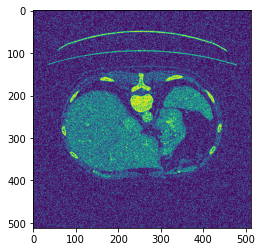

In [ ]:
plt.imshow(noise_training_dataset[2])  #to show the noise_training_dataset images of index 2 

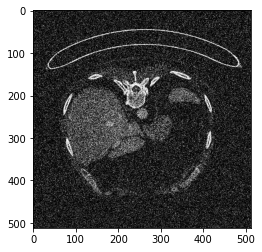

In [ ]:
plt.imshow(noise_test_dataset[2], cmap='gray')      #to show the noise_test-dataset images of index 2 

##Let's take a look into more in noise grayscale images

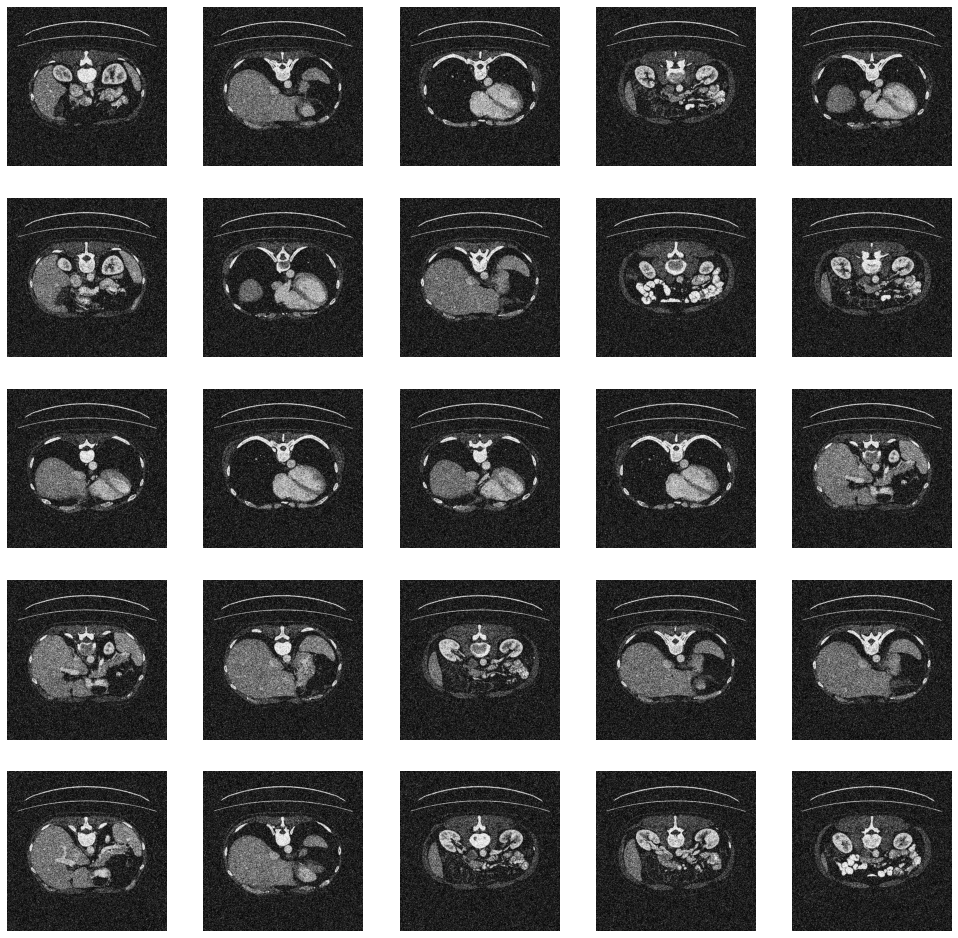

In [ ]:
l_grid=5
w_grid=5
fig,axes=plt.subplots(l_grid,w_grid,figsize=(17,17))
axes=axes.ravel()
for i in range(l_grid*w_grid):
  index=np.random.randint(0,len(noise_training_dataset))
  axes[i].imshow(noise_training_dataset[index],cmap='gray')
  axes[i].set_axis_off()

#!!Hurray!! Finally we reach into our last step it is last but not  the least believe me journey will not gonna end here
###so will build the modele using keras library and with some predefined autoencoders and we will see result on each autoencoders in the form of our  prediction

####First we gonna import some import libraries in order to create our model 

In [ ]:
import tensorflow as tf #google framework to build DL and ML model
import keras
from keras.models import Model
from keras.optimizers import Adadelta
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D,Conv2DTranspose
from keras.callbacks import History

Using TensorFlow backend.


###Here is the sequential Model of autoencoder that I have made with keras library using tensorflow

##The Sequential model, which is very straightforward (a simple list of layers), but is limited to single-input, single-output stacks of layers (as the name gives away).

####Layers are the basic building blocks of neural networks in Keras. A layer consists of a tensor-in tensor-out computation function (the layer's call method) and some state, held in TensorFlow variables (the layer's weights).


##2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the sample axis), e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last".

In [ ]:
autoencoder = tf.keras.models.Sequential()
#encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=15, kernel_size = 5, strides = 1,activation='relu', padding = 'same', input_shape = (512,512,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=15, kernel_size = 5, strides = 1, activation='relu',padding='same'))
autoencoder.add(tf.keras.layers.Conv2D(filters=15, kernel_size = 5, strides = 1, activation='relu', padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2D(filters=15, kernel_size = 5, strides = 1, activation='relu', padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2D(filters=15, kernel_size = 5, strides = 1, activation='relu', padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2D(filters=15, kernel_size = 5, strides = 1, activation='relu'))
#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=15, kernel_size = 5, strides = 1, activation='relu'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=15, kernel_size = 5, strides = 1, activation='relu', padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=15, kernel_size = 5, strides= 1, activation='relu', padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=15, kernel_size = 5, strides = 1, activation = 'relu', padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size = 5, strides = 1, activation = 'relu', padding = 'same'))

##We will see the number of parameters our model is generatint to train and validate our data
###We will compile and see the summary of the model

In [ ]:
autoencoder.compile(loss= 'binary_crossentropy', optimizer= tf.keras.optimizers.Adam(lr=0.001), metrics =['accuracy'])
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 15)      390       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 15)      5640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 512, 15)      5640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 512, 512, 15)      5640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 512, 512, 15)      5640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 508, 508, 15)      5640      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 512, 512, 15)      5

##The is the very important step in this step we do  Normalisation and sqeeze our dataset dimension  so that we will make it for fitting 

In [ ]:
noise_training_dataset=noise_training_dataset.squeeze()
noise_test_dataset=noise_test_dataset.squeeze()
img_training_dataset=img_training_dataset.squeeze()
img_testing_dataset=img_testing_dataset.squeeze()
img_training_dataset=np.expand_dims(img_training_dataset,axis=3)
img_testing_dataset=np.expand_dims(img_testing_dataset,axis=3)
noise_training_dataset = np.expand_dims(noise_training_dataset,axis =3)
noise_test_dataset = np.expand_dims(noise_test_dataset,axis= 3)
print(img_training_dataset.shape)

(196, 512, 512, 1)


#Lets fit out Model and check it through the accuracy matrics
we will run our model on 10 epochs, 10 batch_size and train 196 datapoint and validate on 22 datapoint 

###keras.fit() in Python is a deep learning libraries which can be used to train our machine learning and deep learning models. 

Keras.fit()

In [ ]:
autoencoder.fit( noise_training_dataset
                ,img_training_dataset,
                 epochs=10,
                 batch_size=10,
                shuffle='True',
                validation_data=(noise_test_dataset,
                                 img_testing_dataset
                                 )
                   )

Epoch 1/10
20/20 [==============================] - 13s 651ms/step - loss: 0.3881 - accuracy: 0.7777 - val_loss: 0.2396 - val_accuracy: 0.8024
Epoch 2/10
20/20 [==============================] - 11s 551ms/step - loss: 0.3098 - accuracy: 0.7777 - val_loss: 0.2419 - val_accuracy: 0.8024
Epoch 3/10
20/20 [==============================] - 11s 557ms/step - loss: 0.3052 - accuracy: 0.7777 - val_loss: 0.2314 - val_accuracy: 0.8024
Epoch 4/10
20/20 [==============================] - 11s 565ms/step - loss: 0.2422 - accuracy: 0.7807 - val_loss: 0.1650 - val_accuracy: 0.8081
Epoch 5/10
20/20 [==============================] - 11s 570ms/step - loss: 0.1708 - accuracy: 0.7870 - val_loss: 0.1388 - val_accuracy: 0.8086
Epoch 6/10
20/20 [==============================] - 11s 564ms/step - loss: 0.1565 - accuracy: 0.7885 - val_loss: 0.1308 - val_accuracy: 0.8089
Epoch 7/10
20/20 [==============================] - 11s 557ms/step - loss: 0.1504 - accuracy: 0.7890 - val_loss: 0.1276 - val_accuracy: 0.8087

#Lets evalute this model

In [ ]:
evaluation = autoencoder.evaluate(noise_test_dataset, img_testing_dataset) #evalutation to see the model performance
#print('testaccuracy :{:.3f}'.format(evaluation))


1/1 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.8099


#Now its time to predict our model and we will see the result

In [ ]:
predicted = autoencoder.predict(noise_test_dataset[:10])

#Lets see the result of  prediction 

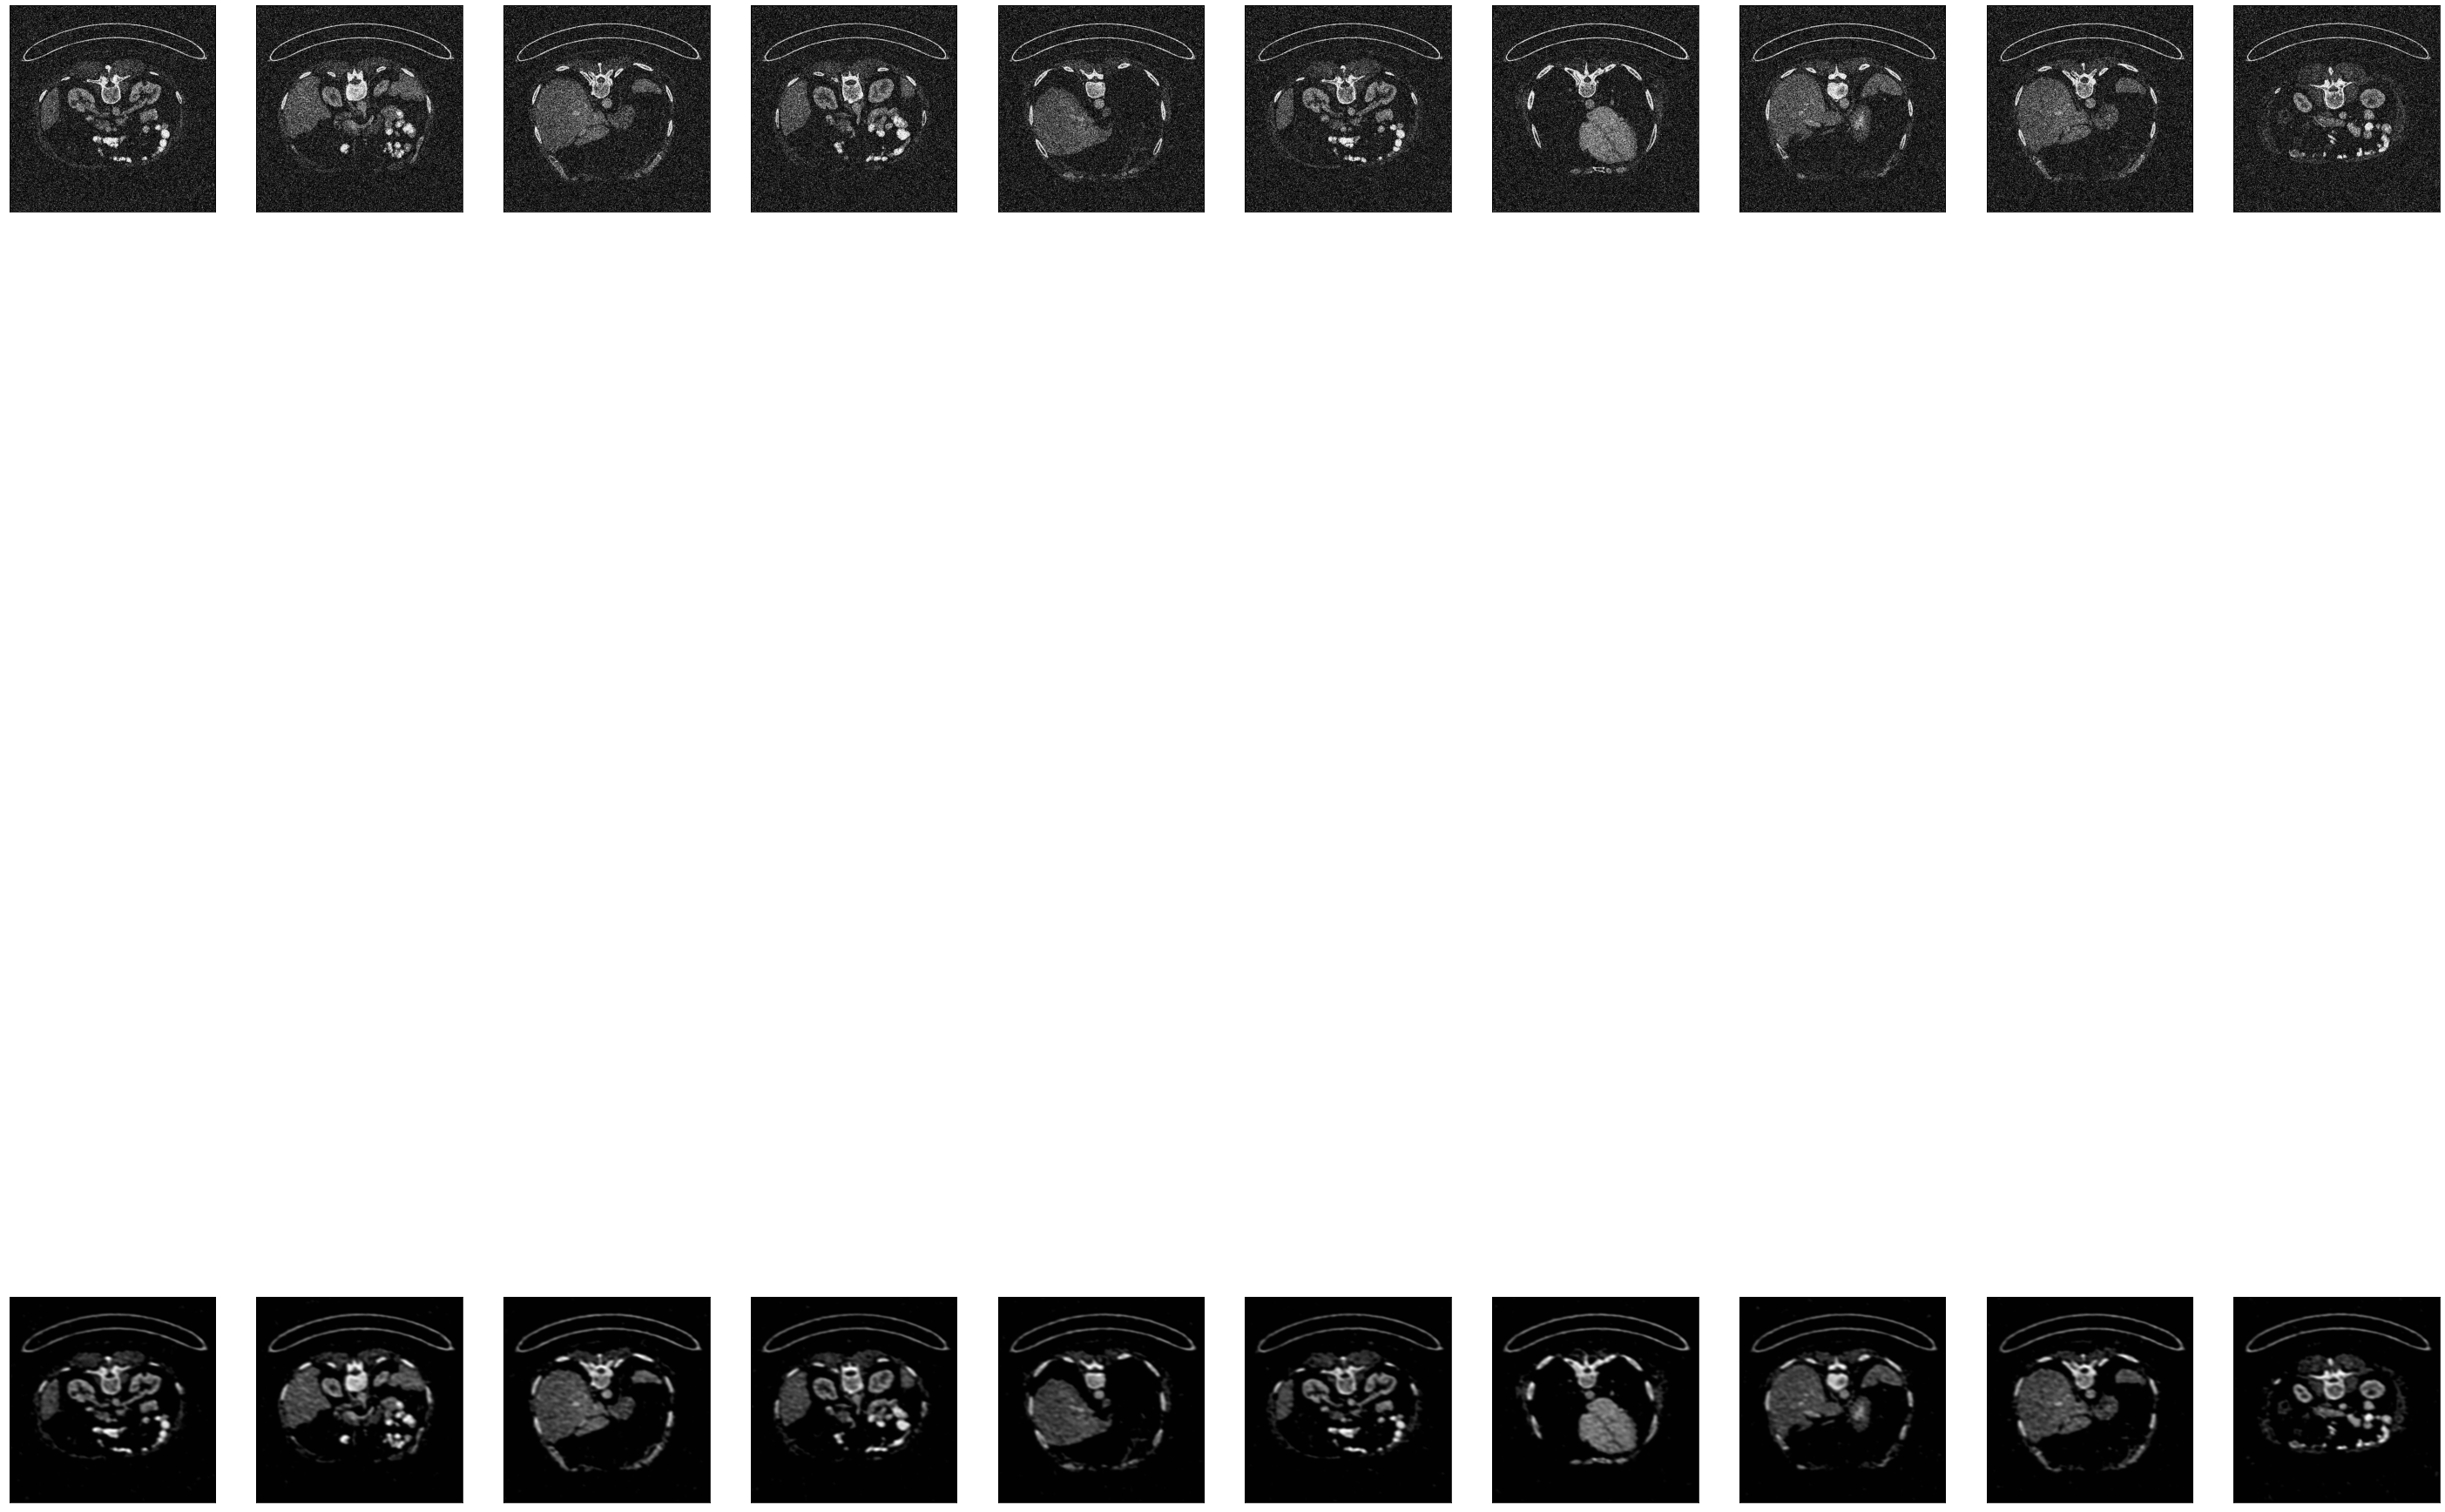

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 10, sharex=True, sharey=True , figsize =  (50,50))
for images, row in zip([noise_test_dataset[:10],predicted],axes):
  for img,  ax in zip(images,row):
    img=img.squeeze()
    ax.imshow(img, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

###As you have seen above the result of what our autoencoders does it clean out images but it get some blurry this is the problem that occurs in autoencoder we have already talked about it if your learn more  about it , you can refers KERAS AUTOENCODERS 


#Just for learning purpose I am showing results of two more autoencoders
##these two autoencoder are taken from keras and result are not good with my dataset

#convolutional autoencoder
####Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders
####Let's implement one. The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

#PS: I am gonna also compare the result with above autoencoder

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(512, 512, 1))  # adapt this if using `channels_first` image data format
Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
#Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
 
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
autoencoder.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 512, 512, 16)      160       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 256, 256, 8)       1160      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 128, 128, 8)       584       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 64, 64, 8)         0  

In [ ]:
from keras.callbacks import TensorBoard 

autoencoder1.fit( noise_training_dataset
                ,img_training_dataset,
                epochs=100,
                batch_size=100,
                shuffle=True,
                validation_data=(noise_test_dataset,
                                 img_testing_dataset),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=True)])

Train on 196 samples, validate on 22 samples
Epoch 1/100
196/196 [==============================] - 2s 10ms/step - loss: 0.2015 - val_loss: 0.2418
Epoch 2/100
196/196 [==============================] - 1s 8ms/step - loss: 0.2015 - val_loss: 0.2398
Epoch 3/100
196/196 [==============================] - 1s 8ms/step - loss: 0.2015 - val_loss: 0.2434
Epoch 4/100
196/196 [==============================] - 1s 8ms/step - loss: 0.2017 - val_loss: 0.2408
Epoch 5/100
196/196 [==============================] - 1s 8ms/step - loss: 0.2017 - val_loss: 0.2415
Epoch 6/100
196/196 [==============================] - 1s 8ms/step - loss: 0.2014 - val_loss: 0.2441
Epoch 7/100
196/196 [==============================] - 1s 8ms/step - loss: 0.2013 - val_loss: 0.2408
Epoch 8/100
196/196 [==============================] - 2s 8ms/step - loss: 0.2012 - val_loss: 0.2445
Epoch 9/100
196/196 [==============================] - 1s 8ms/step - loss: 0.2011 - val_loss: 0.2442
Epoch 10/100
196/196 [=======================

#Evaluate the Model

In [ ]:
evaluation = autoencoder.evaluate(noise_test_dataset, img_testing_dataset) #evalutation to see the model performance

#Predict the model

In [ ]:
predicted = autoencoder1.predict(noise_test_dataset[:10])

#Predicted result

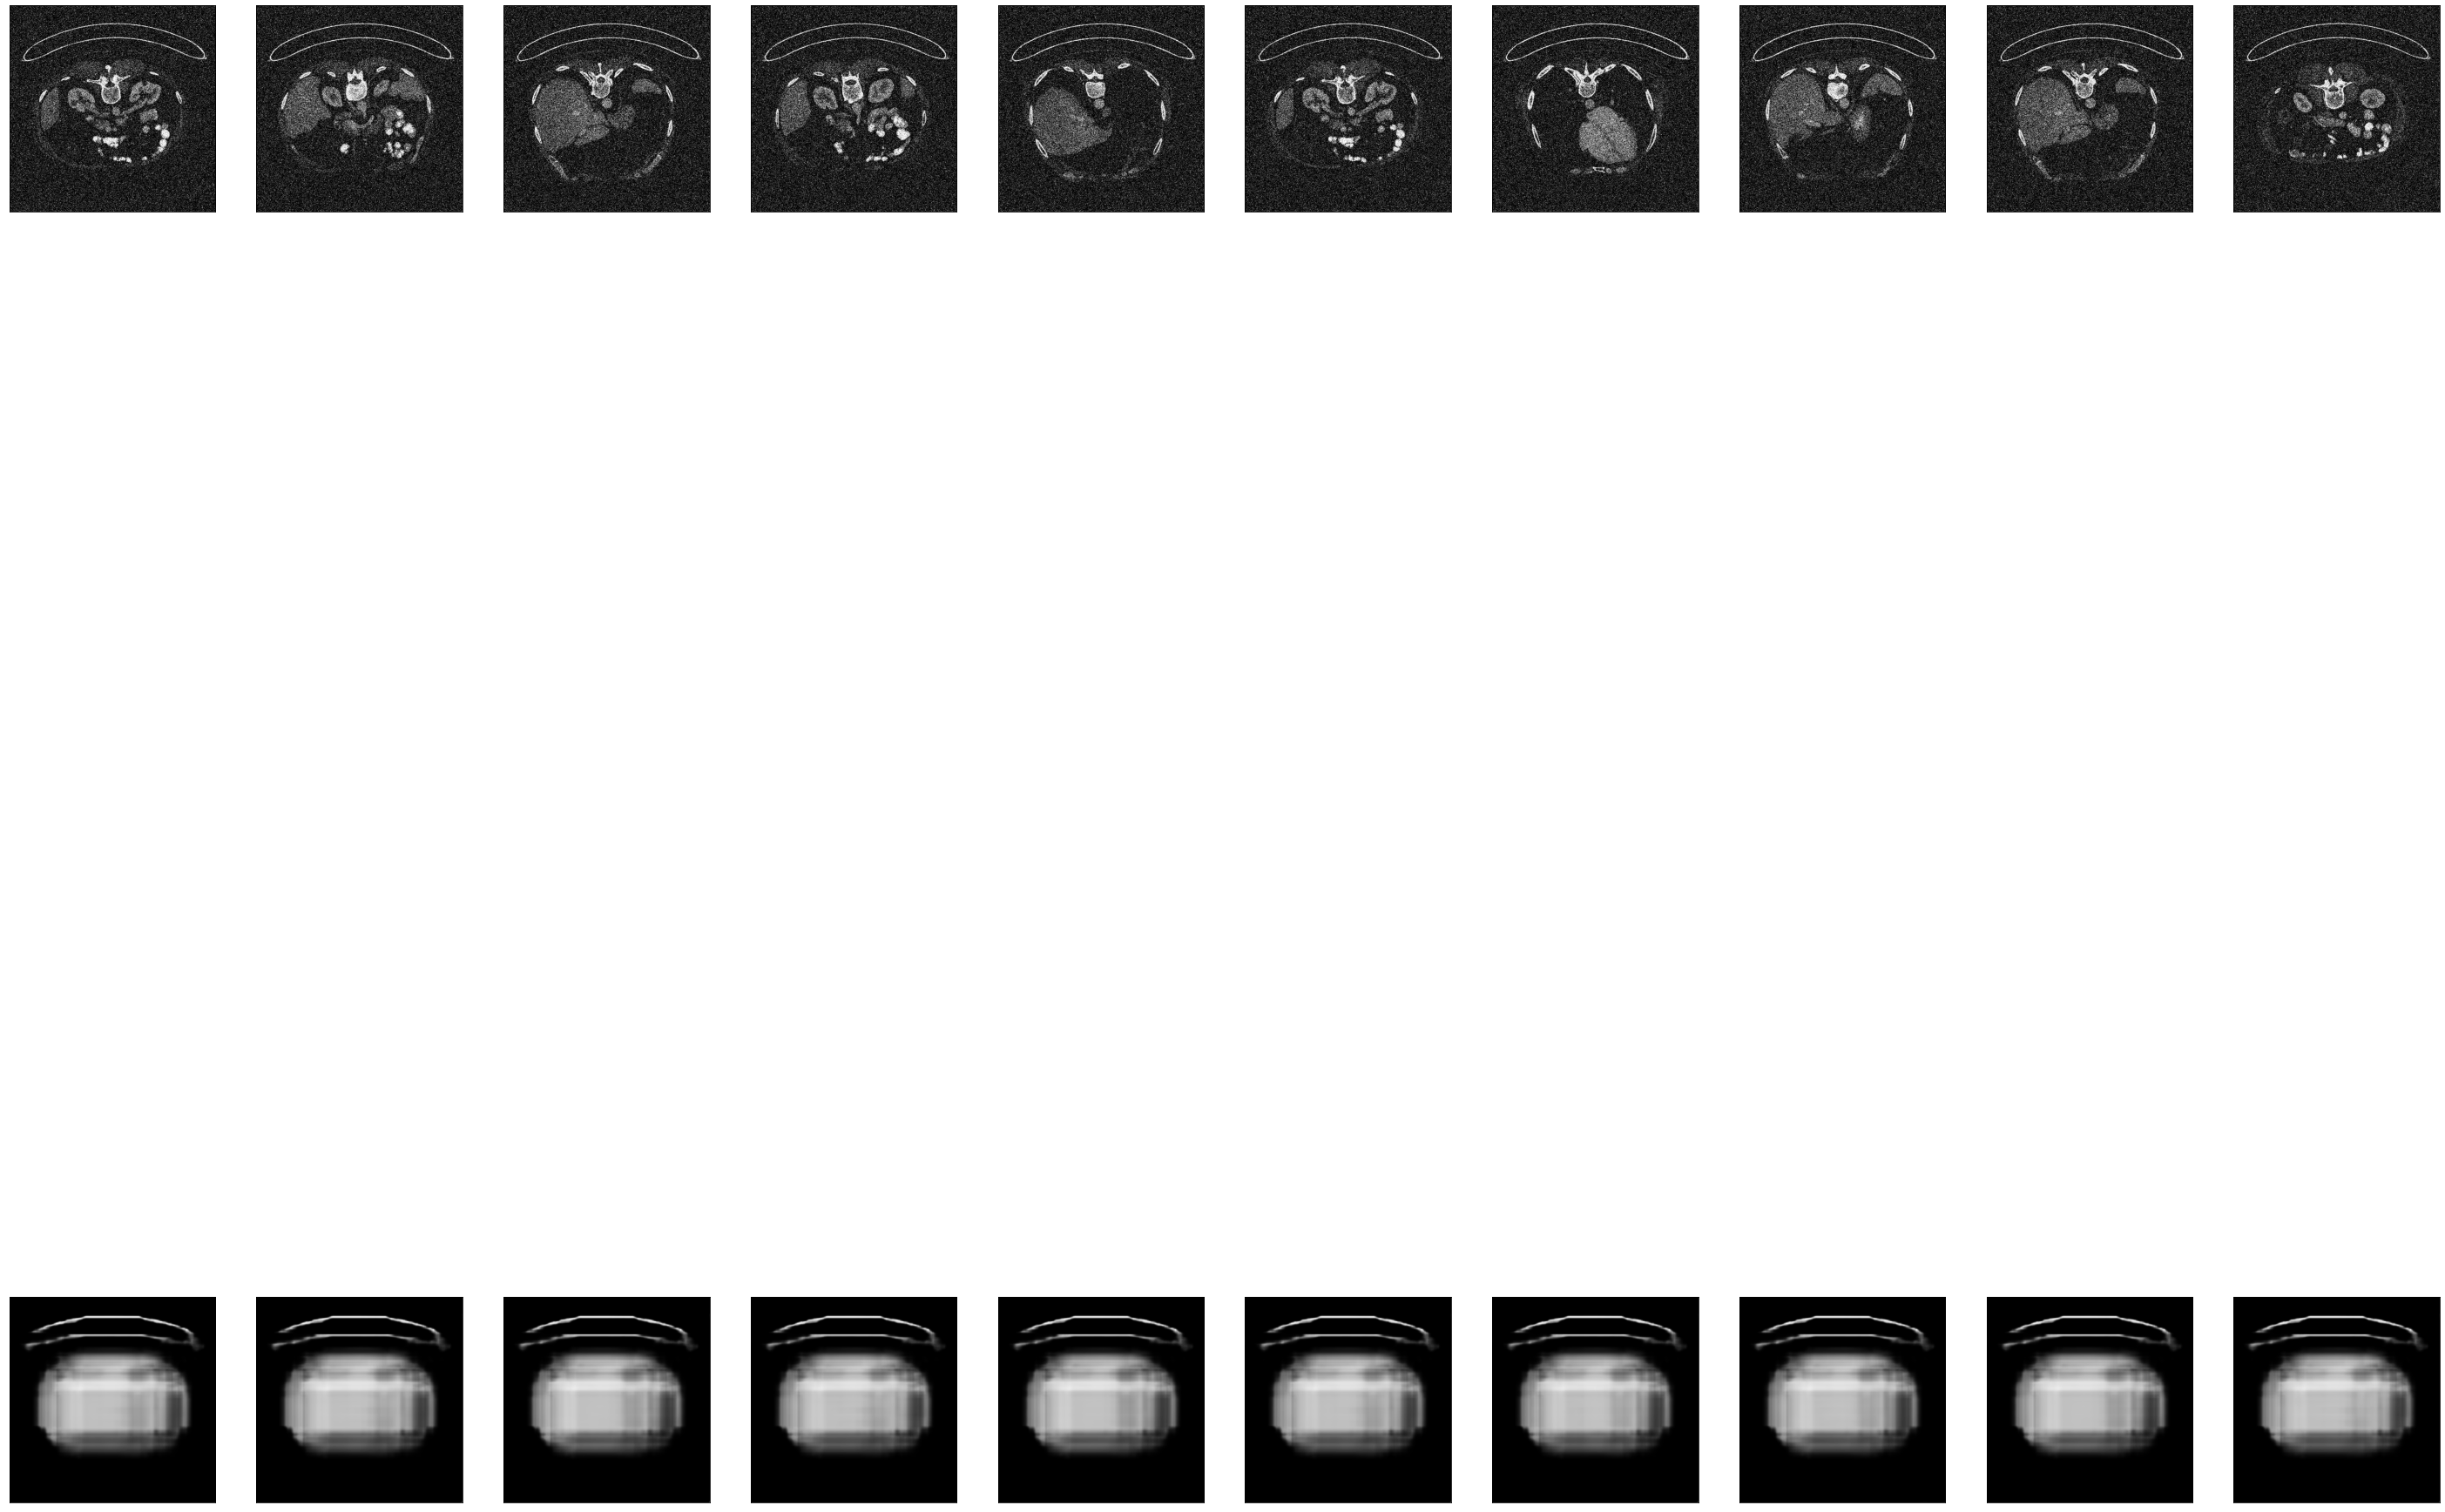

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 10, sharex=True, sharey=True , figsize =  (50,50))
for images, row in zip([noise_test_dataset[:10],predicted],axes):
  for img,  ax in zip(images,row):
    img=img.squeeze()
    ax.imshow(img, cmap='gray' )
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

#Deep autoencoder

In [ ]:
input_img = Input(shape=(512,512,1))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(1, activation='sigmoid')(decoded)

In [ ]:
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 512, 512, 16)      160       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 256, 256, 8)       1160      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 128, 128, 8)       584       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 64, 64, 8)         0   

##Compile and Fit the Model

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics = ['accuracy'])

autoencoder.fit( noise_training_dataset
                ,img_training_dataset,
                epochs=5,
                batch_size=5,
                shuffle=True,
                validation_data=(noise_test_dataset,
                                 img_testing_dataset))

Train on 196 samples, validate on 22 samples
Epoch 1/5
196/196 [==============================] - 24s 120ms/step - loss: 0.4170 - accuracy: 0.7688 - val_loss: 0.2438 - val_accuracy: 0.8024
Epoch 2/5
196/196 [==============================] - 23s 119ms/step - loss: 0.3117 - accuracy: 0.7777 - val_loss: 0.2478 - val_accuracy: 0.8024
Epoch 3/5
196/196 [==============================] - 23s 120ms/step - loss: 0.3117 - accuracy: 0.7777 - val_loss: 0.2372 - val_accuracy: 0.8024
Epoch 4/5
196/196 [==============================] - 24s 121ms/step - loss: 0.3117 - accuracy: 0.7777 - val_loss: 0.2492 - val_accuracy: 0.8024
Epoch 5/5
196/196 [==============================] - 24s 122ms/step - loss: 0.3117 - accuracy: 0.7777 - val_loss: 0.2422 - val_accuracy: 0.8024


#Evalute the model

In [ ]:
evaluation = autoencoder.evaluate(noise_test_dataset, img_testing_dataset) #evalutation to see the model performance

#Predict the Model

In [ ]:
predicted = autoencoder.predict(noise_test_dataset[:10])

#Predicted Result

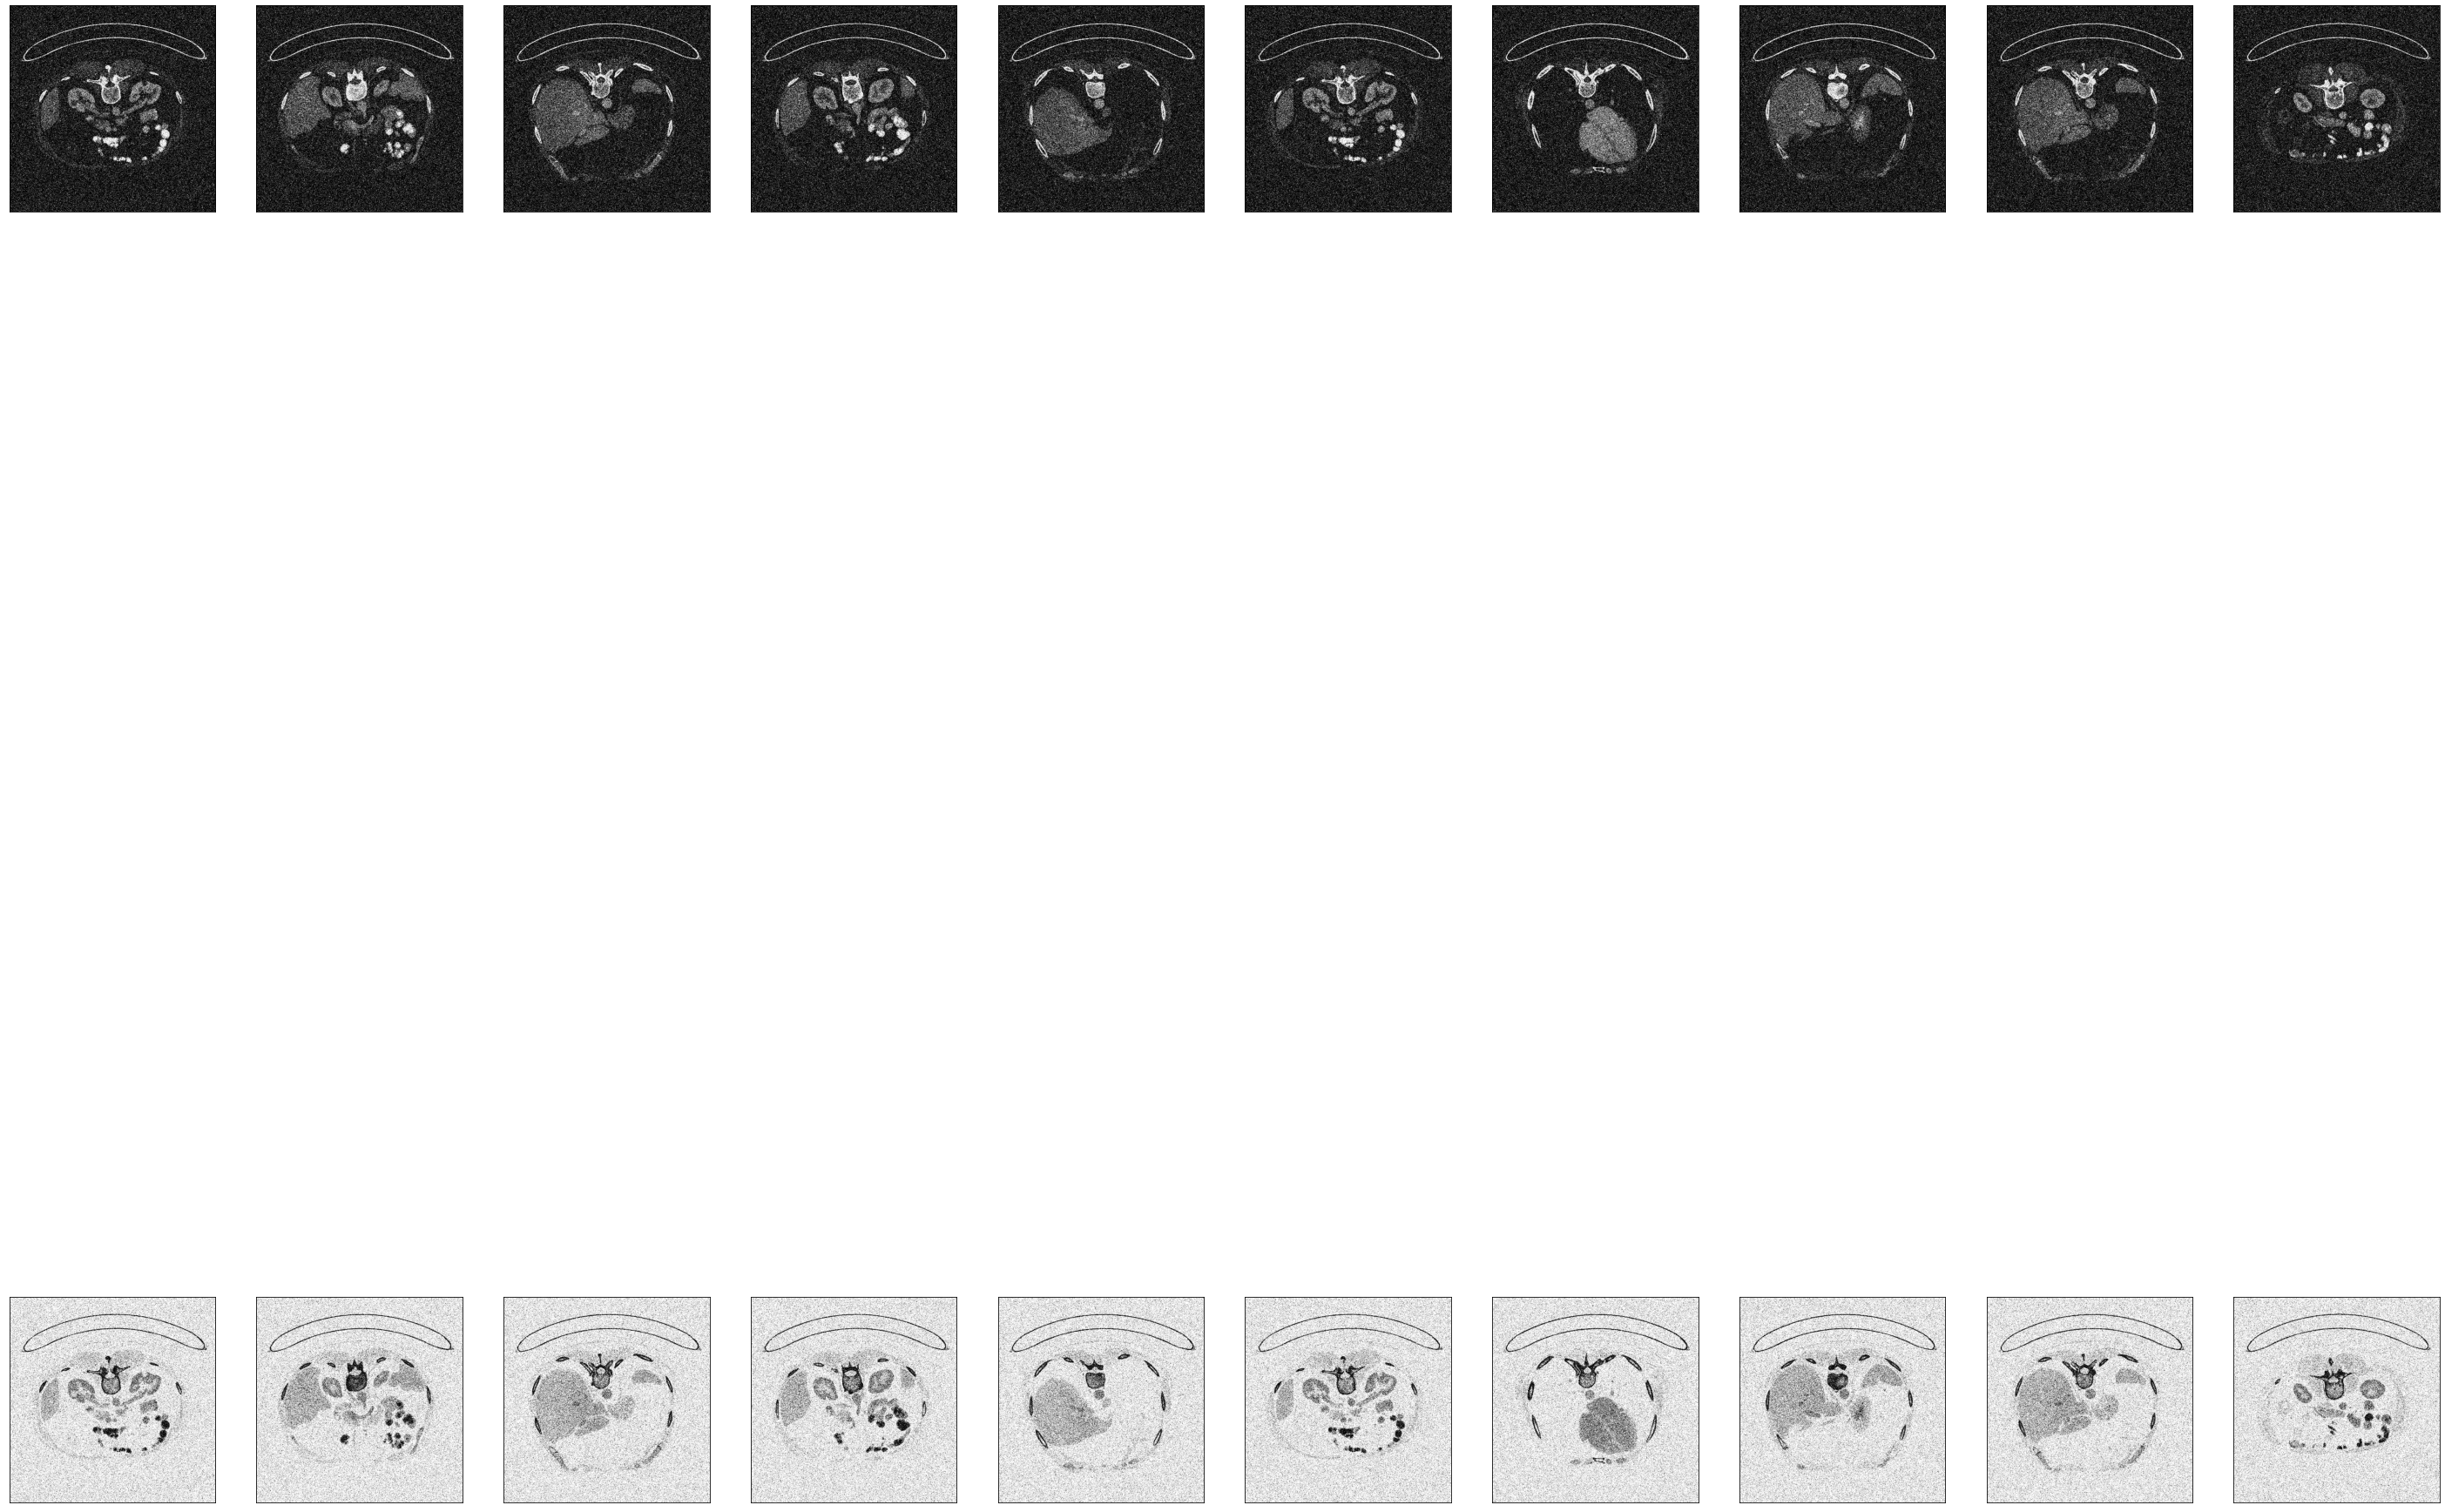

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 10, sharex=True, sharey=True , figsize =  (50,50))
for images, row in zip([noise_test_dataset[:10],predicted],axes):
  for img,  ax in zip(images,row):
    img=img.squeeze()
    ax.imshow(img, cmap='gray' )
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

SEE I have told you the results are not good the autoencoders that I have created from the sequential Model it has the best result among all three of them but it will not gonna happen always it totally depends on your dataset,
My suggestion is to not waste your time in generating model though it is good but you can go with keras Application to build "the state of art model" because the results depends on multiple number it its depends what kind of machine you are using(GPU SPEED ETC) while training the model, you want to learn more about keras you go with keras and tensorflow website you will learn plenty numbers of thing.
#GOOOD BYE :)
